In [61]:
# Importações na venv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Carregando a Análise Exploratória
df = pd.read_csv('data/Dataset.csv')
print("Informações do Dataset: \n")
display(df.info())
print("\nPrimeiras linhas do dataset:")
display(df.head())

print("Primeiras linhas aparecendo masculino:")
display(df[df['Gênero'] == 'Masculino'].head())



Informações do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


None


Primeiras linhas do dataset:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.00,30000.00,Feminino,5.74,Não,0
1,58.00,50000.00,Feminino,21.89,Sim,0
2,50.00,70000.00,Feminino,6.12,Não,1
3,21.00,100000.00,Feminino,16.26,Não,0
4,59.00,50000.00,Feminino,28.24,Sim,1


Primeiras linhas aparecendo masculino:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
7,50.00,100000.00,Masculino,23.25,Não,0
8,34.00,30000.00,Masculino,27.06,Sim,1
9,41.00,70000.00,Masculino,21.77,Sim,0
10,51.00,50000.00,Masculino,11.45,Sim,0
11,45.00,100000.00,Masculino,21.87,Sim,0


Valores únicos na coluna Gênero:
['Feminino' 'Masculino' nan]

Contagem por Gênero:


Gênero
Masculino    99
Feminino     94
Name: count, dtype: int64

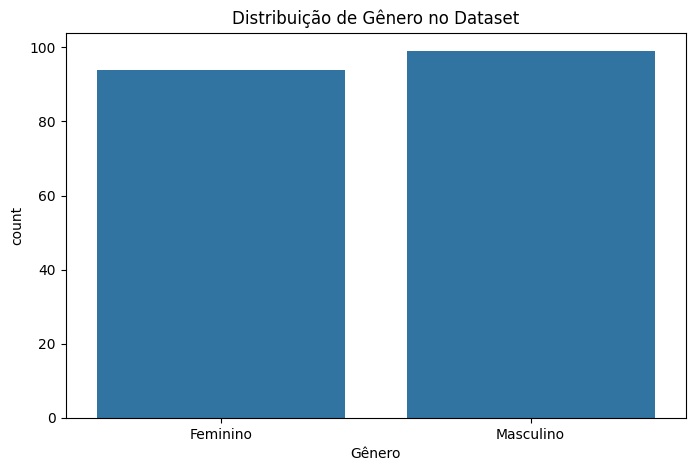


Quantidade de valores nulos em Gênero:
7


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''Distribuição de Gênero'''

# Carregar os dados
df = pd.read_csv('data/Dataset.csv')

# Verificar valores únicos na coluna Gênero
print("Valores únicos na coluna Gênero:")
print(df['Gênero'].unique())

# Contagem de cada gênero
print("\nContagem por Gênero:")
display(df['Gênero'].value_counts())

# Criar um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gênero')
plt.title('Distribuição de Gênero no Dataset')
plt.show()

# Verificar se há valores nulos
print("\nQuantidade de valores nulos em Gênero:")
print(df['Gênero'].isnull().sum())

In [37]:
# 2. Análise de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


In [43]:
# 3. Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas(raw):")
display(df.describe())



# Ajustando o formato dos números para duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

# Filtrando valores inválidos na coluna "Tempo no Site (min)"
df = df[df['Tempo no Site (min)'] >= 0]

# Selecionando apenas colunas relevantes
colunas_relevantes = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
stats = df[colunas_relevantes].describe().round(2)

# Exibindo estatísticas descritivas ajustadas e limpas
print("\nEstatísticas descritivas (ajustadas e limpas):")
display(stats)



Estatísticas descritivas(raw):


,Idade,Renda Anual (em $),Tempo no Site (min),Compra (0 ou 1)
count,187.00,185.00,195.00,195.00
mean,38.52,58432.43,17.82,0.33
std,12.66,25775.52,7.23,0.47
min,18.00,30000.00,5.05,0.00
25%,28.00,30000.00,11.72,0.00
50%,38.00,50000.00,18.31,0.00
75%,50.00,70000.00,23.94,1.00
max,59.00,100000.00,29.85,1.00



Estatísticas descritivas (ajustadas e limpas):


,Idade,Renda Anual (em $),Tempo no Site (min)
count,187.00,185.00,195.00
mean,38.52,58432.43,17.82
std,12.66,25775.52,7.23
min,18.00,30000.00,5.05
25%,28.00,30000.00,11.72
50%,38.00,50000.00,18.31
75%,50.00,70000.00,23.94
max,59.00,100000.00,29.85


In [47]:
# Vamos verificar a distribuição da coluna "Compra (0 ou 1)"
compra_dist = df['Compra (0 ou 1)'].value_counts()
print("\nDistribuição da coluna 'Compra (0 ou 1)':")
print(compra_dist)

# Calculando as porcentagens
compra_percent = (compra_dist / len(df)) * 100
print("\nPorcentagem de cada categoria:")
print(compra_percent)



Distribuição da coluna 'Compra (0 ou 1)':
Compra (0 ou 1)
0    130
1     65
Name: count, dtype: int64

Porcentagem de cada categoria:
Compra (0 ou 1)
0   66.67
1   33.33
Name: count, dtype: float64


Tarefa 1: Verificar a distribuição das variáveis.
Abaixo estão gráficos mostrando como os dados estão distribuídos para as variáveis 'Idade', 'Renda Anual' e 'Tempo no Site'. Também mostramos a distribuição de 'Compra'.



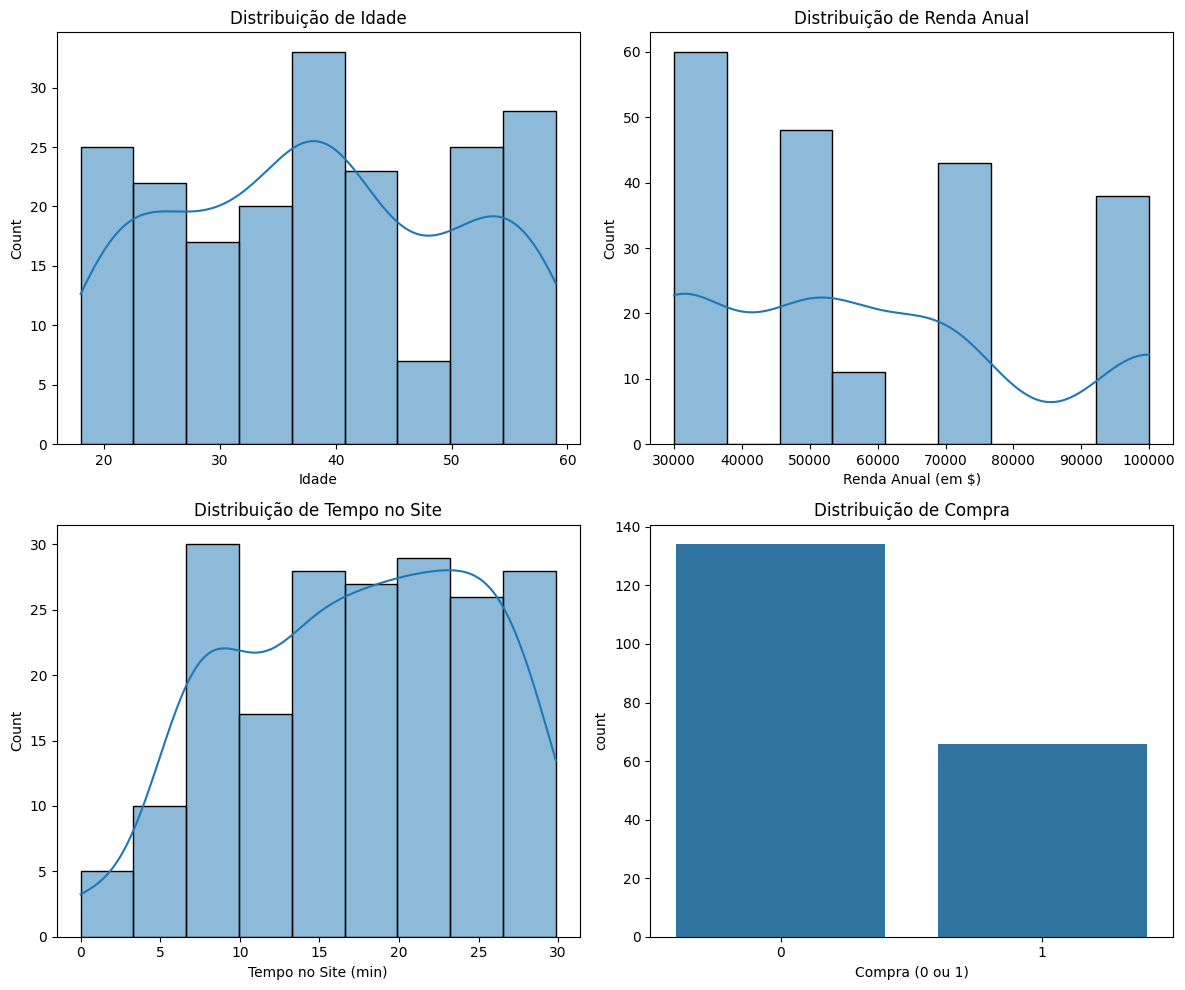

Tarefa 2: Explorar relações entre variáveis independentes e a variável alvo (Compra).
Abaixo estão gráficos que mostram como 'Idade', 'Renda Anual' e 'Tempo no Site' estão relacionados com 'Compra'.



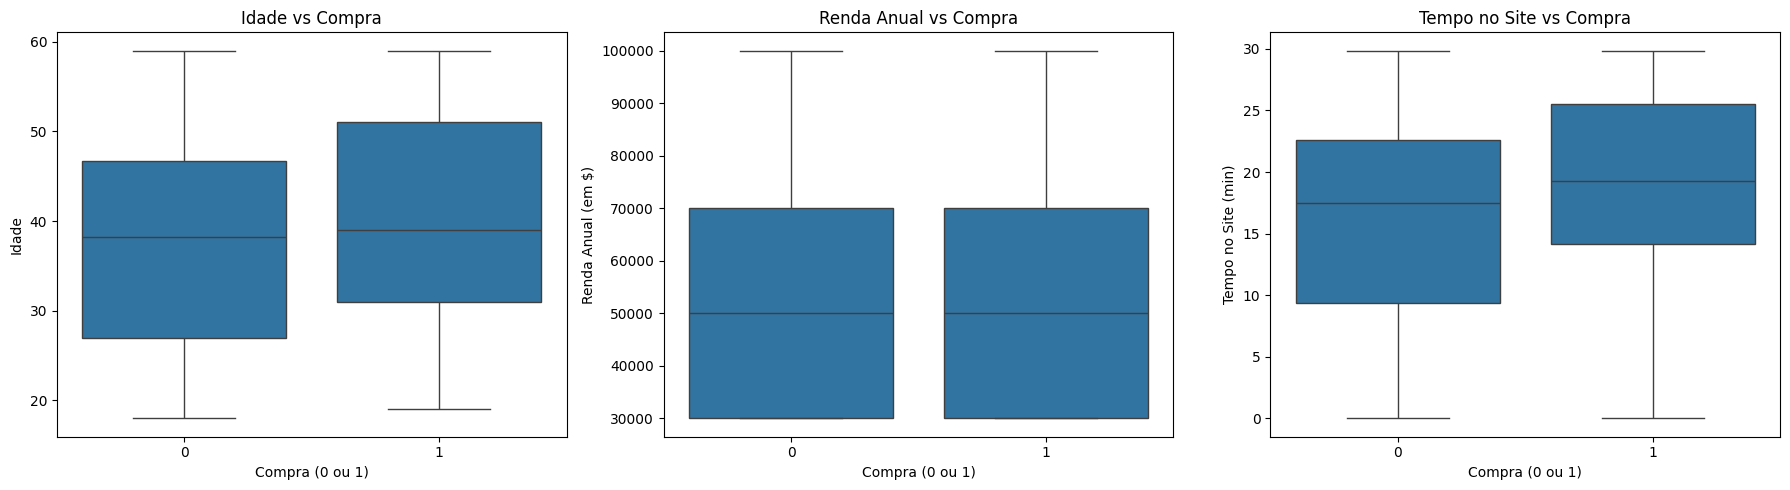

Tarefa 3: Identificar valores ausentes e inconsistências nos dados.
Valores ausentes após o tratamento:
Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset para análise
file_path = 'data/Dataset.csv'
data = pd.read_csv(file_path)

# Substituir valores ausentes por médias (para variáveis numéricas) e moda (para categóricas)
data['Idade'] = data['Idade'].fillna(data['Idade'].mean())
data['Renda Anual (em $)'] = data['Renda Anual (em $)'].fillna(data['Renda Anual (em $)'].mean())
data['Gênero'] = data['Gênero'].fillna(data['Gênero'].mode()[0])
data['Anúncio Clicado'] = data['Anúncio Clicado'].fillna(data['Anúncio Clicado'].mode()[0])

# Corrigir inconsistências no 'Tempo no Site'
data['Tempo no Site (min)'] = data['Tempo no Site (min)'].apply(lambda x: max(x, 0))

# 1. Verificar a distribuição das variáveis
print("Tarefa 1: Verificar a distribuição das variáveis.")
print("Abaixo estão gráficos mostrando como os dados estão distribuídos para as variáveis 'Idade', 'Renda Anual' e 'Tempo no Site'. Também mostramos a distribuição de 'Compra'.\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['Idade'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Idade')
axes[0, 0].set_xlabel('Idade')

sns.histplot(data['Renda Anual (em $)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Renda Anual')
axes[0, 1].set_xlabel('Renda Anual (em $)')

sns.histplot(data['Tempo no Site (min)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Tempo no Site')
axes[1, 0].set_xlabel('Tempo no Site (min)')

sns.countplot(x='Compra (0 ou 1)', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Compra')
axes[1, 1].set_xlabel('Compra (0 ou 1)')

plt.tight_layout()
plt.show()

# 2. Explorar relações entre variáveis independentes e a variável alvo
print("Tarefa 2: Explorar relações entre variáveis independentes e a variável alvo (Compra).")
print("Abaixo estão gráficos que mostram como 'Idade', 'Renda Anual' e 'Tempo no Site' estão relacionados com 'Compra'.\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Compra (0 ou 1)', y='Idade', data=data, ax=axes[0])
axes[0].set_title('Idade vs Compra')
axes[0].set_xlabel('Compra (0 ou 1)')
axes[0].set_ylabel('Idade')

sns.boxplot(x='Compra (0 ou 1)', y='Renda Anual (em $)', data=data, ax=axes[1])
axes[1].set_title('Renda Anual vs Compra')
axes[1].set_xlabel('Compra (0 ou 1)')
axes[1].set_ylabel('Renda Anual (em $)')

sns.boxplot(x='Compra (0 ou 1)', y='Tempo no Site (min)', data=data, ax=axes[2])
axes[2].set_title('Tempo no Site vs Compra')
axes[2].set_xlabel('Compra (0 ou 1)')
axes[2].set_ylabel('Tempo no Site (min)')

plt.tight_layout()
plt.show()

# 3. Identificar valores ausentes (após tratamento) e inconsistências
print("Tarefa 3: Identificar valores ausentes e inconsistências nos dados.")
missing_after = data.isnull().sum()
print("Valores ausentes após o tratamento:")
print(missing_after)
